### 1. 각 군집의 centroid 부터 거리 계산 (주성분 활용)_최종

In [1]:
import pandas as pd
import numpy as np

pca_result = pd.read_csv('./data/minmax_scaling_PCA_label.csv', index_col=0)
subway_data = pd.read_csv('./data/서울지하철_공공데이터_호선별_역별_승하차인원_일평균_행정동포함.csv')
subway_data['호선+역명'] = subway_data['호선'] + '_' + subway_data['역명'] + " "

# kmeans centroid numpy array 불러오기
centroids = np.load('./data/kmeans_centroid.npy')

In [2]:
# 클러스터 레이블 별로 데이터프레임 나누기
pca_cluster_0 = pca_result[pca_result['cluster'] == 0]
pca_cluster_1 = pca_result[pca_result['cluster'] == 1]
pca_cluster_2 = pca_result[pca_result['cluster'] == 2]
pca_cluster_3 = pca_result[pca_result['cluster'] == 3]

In [3]:
# 거리 계산 함수 생성
def calculate_distance(a, b):
    distance = 0
    for i in range(len(a)):
        distance += (a[i] - b[i]) ** 2
    return distance ** 0.5

In [4]:
# 오류 메시지 비활성화
import pandas as pd
pd.options.mode.chained_assignment = None

In [5]:
# 각 cluster centroid로부터 떨어진 거리 계산 -> 'distance' 컬럼
pca_clusters = [pca_cluster_0, pca_cluster_1, pca_cluster_2, pca_cluster_3]

for i, pca_cluster in enumerate(pca_clusters):
    tmp = pca_cluster.drop('cluster', axis=1)
    distances = [calculate_distance(centroids[i], point) for point in tmp.values]
    pca_cluster.loc[:,'distance'] = distances

클러스터별 최단 거리 5위 뽑아보기

In [6]:
# 클러스터별 최단 거리 상위 5개 행정동 추출
top_5 = pd.concat([
    pca_cluster_0.sort_values('distance').head(5),
    pca_cluster_1.sort_values('distance').head(5),
    pca_cluster_2.sort_values('distance').head(5),
    pca_cluster_3.sort_values('distance').head(5),
])

In [7]:
# 추출된 행정동에 위치한 지하철역 mapping
area_w_subway = subway_data.groupby('행정동')['호선+역명'].sum().to_frame()

for i in top_5.index:
    for j in area_w_subway.index:
        if i == j:
            top_5.loc[i, 'subway'] = area_w_subway.loc[j, '호선+역명']

top_5['subway'].fillna("", inplace=True)
top_5['subway'] = top_5['subway'].map(lambda x: ','.join(x.split()))
top_5

,0,1,2,3,4,5,cluster,distance,subway
행정동명,,,,,,,,,
송파2동,0.079815,-0.244630,0.027826,0.015311,-0.039013,-0.010445,0,0.143294,
남가좌1동,0.088593,-0.312289,0.017162,-0.167120,0.047328,0.041055,0,0.158830,경의중앙선_가좌
하계2동,0.164587,-0.306063,-0.004596,-0.099306,-0.003715,-0.035986,0,0.163167,7호선_하계
방이1동,-0.056980,-0.250338,0.119408,-0.080721,-0.087399,0.055004,0,0.168104,5호선_방이
방배3동,0.100324,-0.300655,0.057266,0.061770,0.054492,0.053401,0,0.173730,2호선_방배
면목4동,-0.075829,-0.078424,-0.163650,0.052472,0.042259,0.000171,1,0.089658,7호선_용마산
암사1동,-0.065351,-0.064685,-0.098996,-0.018784,0.066846,0.051345,1,0.093978,8호선_암사
홍제3동,-0.044947,-0.102270,-0.078139,0.104911,0.052648,-0.021009,1,0.110024,3호선_홍제
화곡2동,-0.077616,-0.105319,-0.091817,-0.046530,-0.033173,0.018272,1,0.112856,


In [8]:
top_5.to_csv('./data/optimal_location_w_subway_station.csv')

- 전체 클러스터

In [9]:
cluster = pd.concat([
    pca_cluster_0.sort_values('distance'),
    pca_cluster_1.sort_values('distance'),
    pca_cluster_2.sort_values('distance'),
    pca_cluster_3.sort_values('distance'),
]) #전체 클러스터

In [10]:
# 추출된 행정동에 위치한 지하철역 mapping
area_w_subway = subway_data.groupby('행정동')['호선+역명'].sum().to_frame()

for i in cluster.index:
    for j in area_w_subway.index:
        if i == j:
            cluster.loc[i, 'subway'] = area_w_subway.loc[j, '호선+역명']

cluster['subway'].fillna("", inplace=True)
cluster['subway'] = cluster['subway'].map(lambda x: ','.join(x.split()))
cluster

,0,1,2,3,4,5,cluster,distance,subway
행정동명,,,,,,,,,
송파2동,0.079815,-0.244630,0.027826,0.015311,-0.039013,-0.010445,0,0.143294,
남가좌1동,0.088593,-0.312289,0.017162,-0.167120,0.047328,0.041055,0,0.158830,경의중앙선_가좌
하계2동,0.164587,-0.306063,-0.004596,-0.099306,-0.003715,-0.035986,0,0.163167,7호선_하계
방이1동,-0.056980,-0.250338,0.119408,-0.080721,-0.087399,0.055004,0,0.168104,5호선_방이
방배3동,0.100324,-0.300655,0.057266,0.061770,0.054492,0.053401,0,0.173730,2호선_방배
...,...,...,...,...,...,...,...,...,...
둔촌1동,-0.621720,-0.141444,0.188045,-0.126260,-0.362875,0.062102,3,0.663973,9호선_둔촌오륜
필동,-0.660355,-0.048411,0.392070,0.419604,-0.405873,-0.258607,3,0.892370,"3호선_충무로,4호선_충무로"
명동,-0.523548,0.380905,0.775273,0.175097,0.416959,0.214580,3,0.933855,"2호선_을지로입구,4호선_명동"


### 컬럼별 서울시 전체 평균, 클러스터별 평균 비교

- original data

In [132]:
original_df = pd.read_csv('./data/final_data_after_winsorization_with_selected_features.csv', index_col=0)
cluster_0 = original_df.loc[pca_result[pca_result['cluster'] == 0].index, :]
cluster_1 = original_df.loc[pca_result[pca_result['cluster'] == 1].index, :]
cluster_2 = original_df.loc[pca_result[pca_result['cluster'] == 2].index, :]
cluster_3 = original_df.loc[pca_result[pca_result['cluster'] == 3].index, :]

result = pd.DataFrame([original_df.mean(), cluster_0.mean(), cluster_1.mean(), cluster_2.mean(), cluster_3.mean()], index = ['서울시 전체', 'cluster0', 'cluster1', 'clutser2', 'cluster3'])
result

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
서울시 전체,25.476817,4.232394,0.262911,77.733513,3.326291,0.636150,310647.906103,51.877934,0.000095,40772.171362,0.074794,0.297185,0.260617,0.435510
cluster0,20.972684,4.092105,0.263158,127.965954,1.921053,0.328947,247284.092105,39.710526,0.000119,34983.263158,0.115728,0.234621,0.229287,0.256747
cluster1,19.699113,3.062147,0.118644,59.416775,3.604520,0.259887,207714.299435,32.288136,0.000093,33996.446328,0.064191,0.280858,0.292038,0.439798
clutser2,22.532050,7.310000,0.400000,47.197226,3.820000,0.960000,426431.140000,67.250000,0.000084,63910.970000,0.083270,0.296587,0.255910,0.406062
cluster3,48.208932,3.000000,0.424658,111.679069,3.438356,1.424658,467587.287671,90.986301,0.000089,31530.808219,0.046276,0.402727,0.223494,0.651561


In [134]:
# 서울시 전체 평균과 각 클러스터별 비교 데이터프레임 생성 (셀이 많아져서 concat해서 표시)
pd.concat([
    pd.DataFrame([original_df.mean(), cluster_0.mean()], index = ['서울시 전체', 'cluster0']),
    pd.DataFrame([original_df.mean(), cluster_1.mean()], index = ['서울시 전체', 'cluster1']),
    pd.DataFrame([original_df.mean(), cluster_2.mean()], index = ['서울시 전체', 'cluster2']),
    pd.DataFrame([original_df.mean(), cluster_3.mean()], index = ['서울시 전체', 'cluster3'])
])

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
서울시 전체,25.476817,4.232394,0.262911,77.733513,3.326291,0.636150,310647.906103,51.877934,0.000095,40772.171362,0.074794,0.297185,0.260617,0.435510
cluster0,20.972684,4.092105,0.263158,127.965954,1.921053,0.328947,247284.092105,39.710526,0.000119,34983.263158,0.115728,0.234621,0.229287,0.256747
서울시 전체,25.476817,4.232394,0.262911,77.733513,3.326291,0.636150,310647.906103,51.877934,0.000095,40772.171362,0.074794,0.297185,0.260617,0.435510
cluster1,19.699113,3.062147,0.118644,59.416775,3.604520,0.259887,207714.299435,32.288136,0.000093,33996.446328,0.064191,0.280858,0.292038,0.439798
서울시 전체,25.476817,4.232394,0.262911,77.733513,3.326291,0.636150,310647.906103,51.877934,0.000095,40772.171362,0.074794,0.297185,0.260617,0.435510
cluster2,22.532050,7.310000,0.400000,47.197226,3.820000,0.960000,426431.140000,67.250000,0.000084,63910.970000,0.083270,0.296587,0.255910,0.406062
서울시 전체,25.476817,4.232394,0.262911,77.733513,3.326291,0.636150,310647.906103,51.877934,0.000095,40772.171362,0.074794,0.297185,0.260617,0.435510
cluster3,48.208932,3.000000,0.424658,111.679069,3.438356,1.424658,467587.287671,90.986301,0.000089,31530.808219,0.046276,0.402727,0.223494,0.651561


- scaled data

In [17]:
# minmax scaled data 불러와서 cluster label 붙이기
scaled_df = pd.read_csv('./data/minmax_scaling.csv', index_col=0)
if scaled_df.index.equals(pca_result.index):
    tmp = scaled_df.copy()
    tmp['cluster'] = pca_result['cluster']
tmp.head(2)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,cluster
행정동명,,,,,,,,,,,,,,,
가락1동,0.014204,0.076923,0.0,0.025989,0.116279,0.0,0.085682,0.105911,0.125300,0.639775,0.426207,0.408414,0.457904,0.112284,0
가락2동,0.014204,0.346154,0.0,0.035016,0.034884,0.0,0.088504,0.182266,0.220257,0.745585,0.466991,0.415310,0.489702,0.269226,2


In [136]:
# 클러스터별로 따로 데이터프레임 만들기
scaled_cluster_0 = tmp[tmp['cluster'] == 0].drop('cluster', axis=1)
scaled_cluster_1 = tmp[tmp['cluster'] == 1].drop('cluster', axis=1)
scaled_cluster_2 = tmp[tmp['cluster'] == 2].drop('cluster', axis=1)
scaled_cluster_3 = tmp[tmp['cluster'] == 3].drop('cluster', axis=1)

# 서울시 전체 평균 + 각 클러스터별 평균 합친 버전
scaled_result = pd.DataFrame([scaled_df.mean(), scaled_cluster_0.mean(), scaled_cluster_1.mean(), scaled_cluster_2.mean(), scaled_cluster_3.mean()], index = ['서울시 전체', 'scaled_cluster0', 'scaled_cluster1', 'scaled_clutser2', 'scaled_cluster3'])
scaled_result

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
서울시 전체,0.041083,0.162784,0.023901,0.077117,0.038678,0.020521,0.152383,0.127778,0.218402,0.440374,0.332697,0.445560,0.565364,0.458104
scaled_cluster0,0.027505,0.157389,0.023923,0.127592,0.022338,0.010611,0.118819,0.097809,0.273914,0.359629,0.516109,0.351139,0.496944,0.228707
scaled_cluster1,0.023666,0.117775,0.010786,0.058712,0.041913,0.008383,0.097860,0.079527,0.214019,0.345865,0.285187,0.420920,0.633986,0.463607
scaled_clutser2,0.032206,0.281154,0.036364,0.046434,0.044419,0.030968,0.213712,0.165640,0.193669,0.763118,0.370675,0.444657,0.555086,0.420316
scaled_cluster3,0.109606,0.115385,0.038605,0.111226,0.039981,0.045957,0.235512,0.224104,0.205114,0.311474,0.204914,0.604845,0.484293,0.735352


In [56]:
# 서울시 평균, cluster_0의 평균, cluster_0의 상위 5개 지역의 평균(scaled data 이용)
compared_cluster_0 = pd.DataFrame([scaled_df.mean(), 
            scaled_cluster_0.mean(), 
            (scaled_cluster_0.loc[top_5.index[:5], :]).mean()], 
            index = ['서울시 전체', 'scaled_cluster0', 'cluster0_top5']).T

compared_cluster_1 = pd.DataFrame([scaled_df.mean(), 
            scaled_cluster_1.mean(), 
            (scaled_cluster_1.loc[top_5.index[5:10], :]).mean()], 
            index = ['서울시 전체', 'scaled_cluster1', 'cluster1_top5']).T

compared_cluster_2 = pd.DataFrame([scaled_df.mean(), 
            scaled_cluster_2.mean(), 
            (scaled_cluster_2.loc[top_5.index[10:15], :]).mean()], 
            index = ['서울시 전체', 'scaled_cluster2', 'cluster2_top5']).T

compared_cluster_3 = pd.DataFrame([
            scaled_df.mean(), 
            scaled_cluster_3.mean(), 
            (scaled_cluster_3.loc[top_5.index[15:20], :]).mean()], 
            index = ['서울시 전체', 'scaled_cluster3', 'cluster3_top5']).T

In [69]:
# pd.melt를 활용해서 df_melted 데이터프레임 생성 -> grouped bar charat 생성하기 위해서
def create_df_melted(df):
    df_melted = pd.melt(
        df.reset_index(), 
        id_vars='index', 
        value_vars= df.columns, 
        var_name='종류', value_name='Value')
    return df_melted

In [94]:
# 차트에 나타내기에 인덱스 문장 길이가 길다 -> grouped bar chart에 표시할 xlabel 이름 짧게 재지정 
modified_index = ['미세먼지지수', '공원수', '도시농업', '매출액', '채소가게수', '제로웨이스트가게수',
       '승하차인원', '카페수', '유치원,초등학교', '인구수', '10대', '2030대',
       '60대이상', '1인세대']

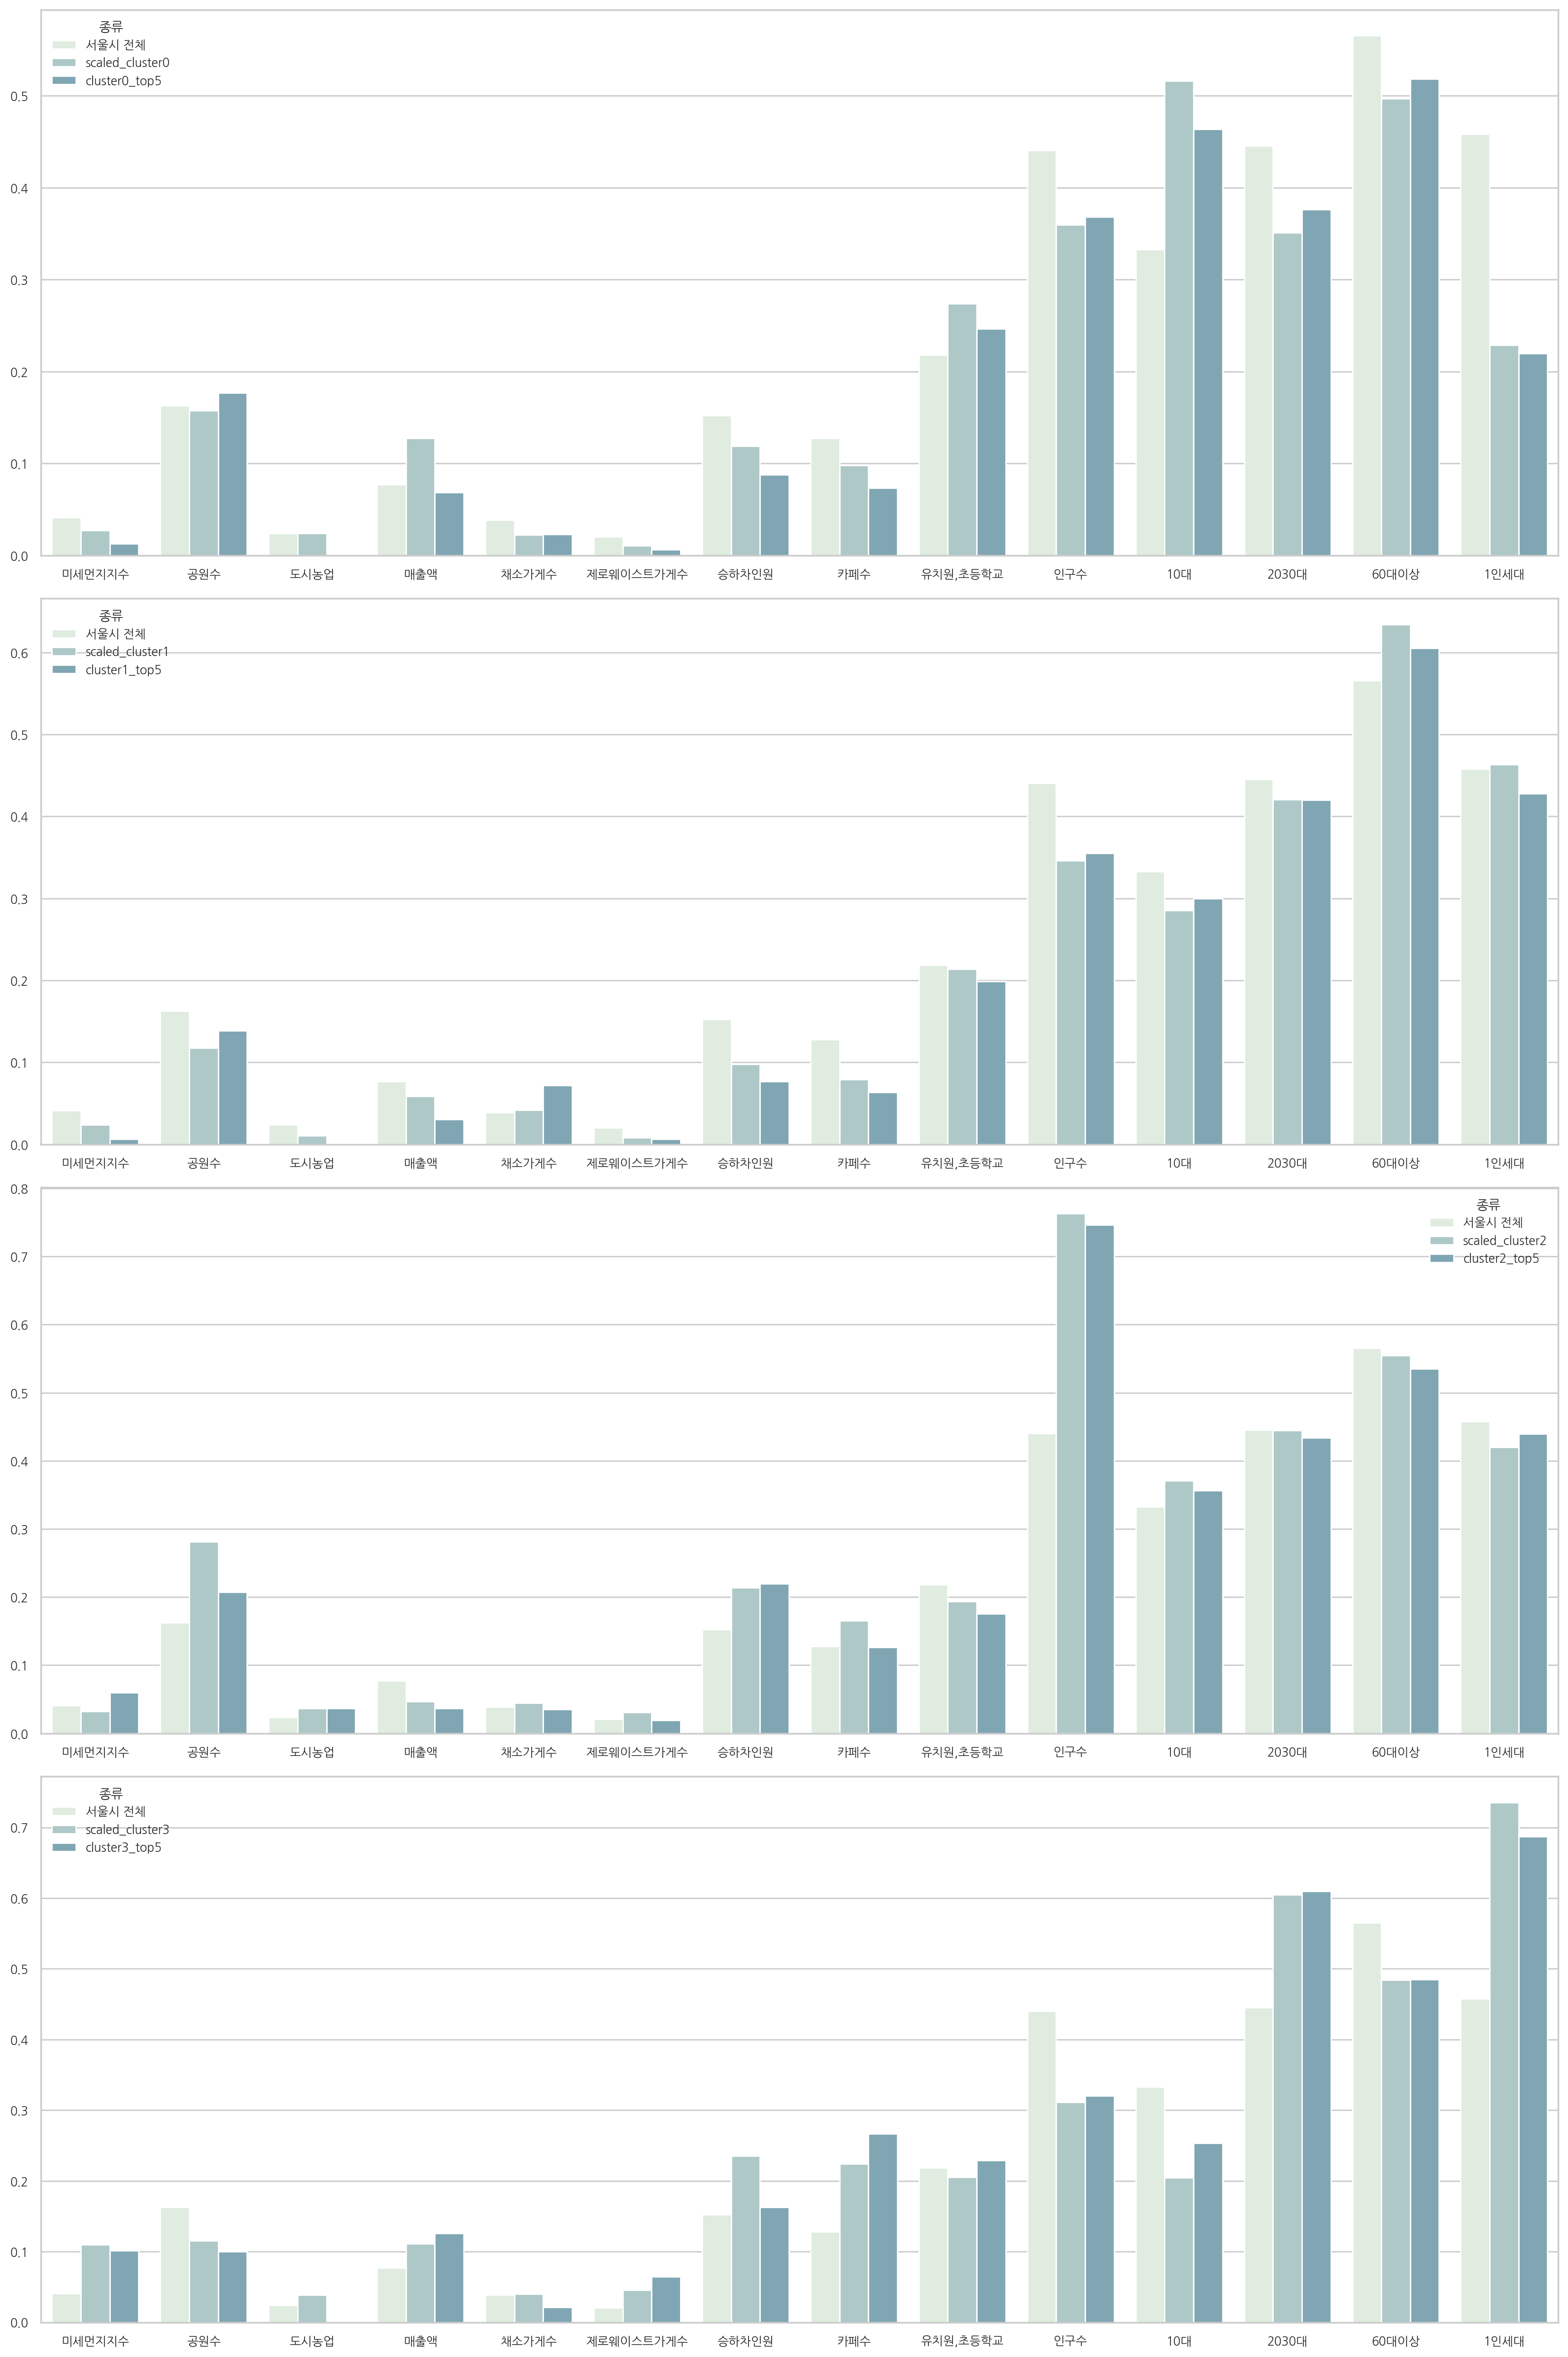

In [126]:
# 서울시 평균 vs cluster_0의 평균 vs cluster_0의 상위 5개 지역의 평균 시각화
import matplotlib.pyplot as plot
import seaborn as sns

df_list = [create_df_melted(i) for i in [compared_cluster_0, compared_cluster_1, compared_cluster_2, compared_cluster_3]]

fig, ax = plt.subplots(4, 1, figsize=(16, 24))
sns.set(style="whitegrid", font='NanumGothic', font_scale=0.8)

for idx, df in enumerate(df_list):
    ax_idx = sns.barplot(x="index", y="Value", hue="종류", data=df, palette="blend:#DED,#7AB", ax=ax[idx])
    ax_idx.set(xlabel=None, ylabel=None)
    ax_idx.set_xticklabels(modified_index)
plt.xticks(rotation=0) 
plt.show()

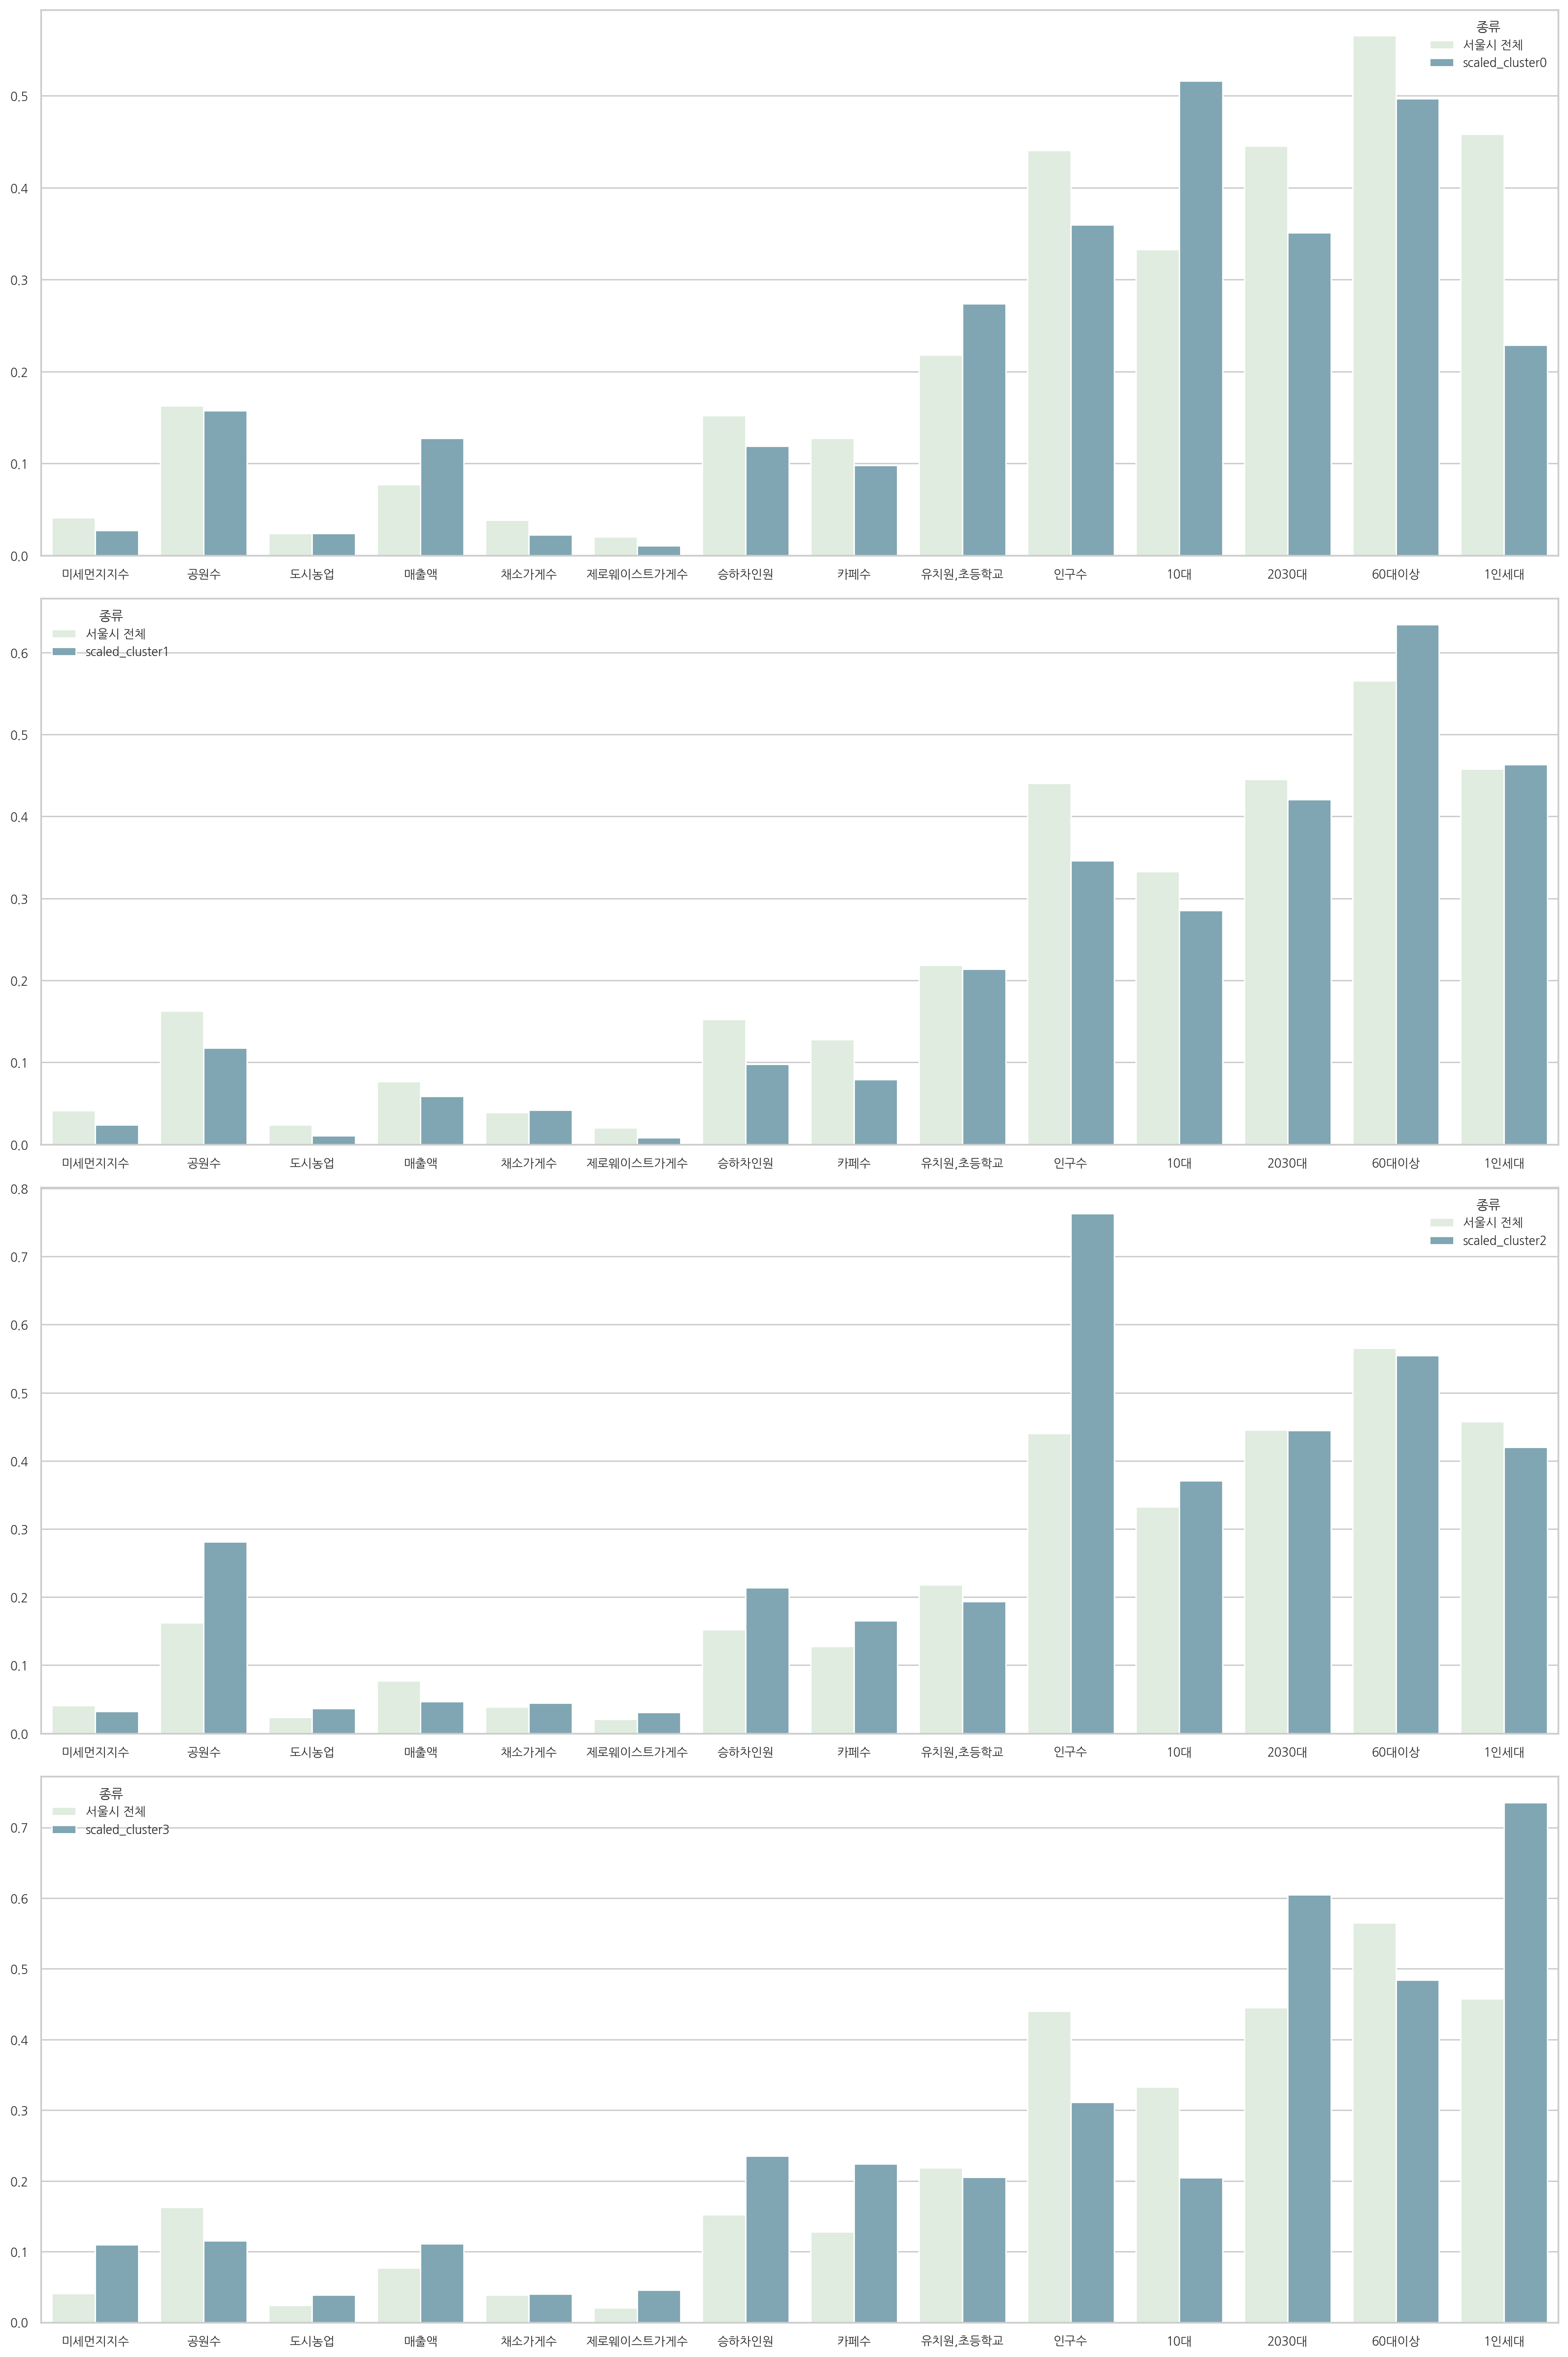

In [131]:
# 서울시 평균 vs cluster_0의 평균 시각화 (compared_cluster_0의 데이터프레임에서 'cluster0_top5' 컬럼 삭제)
import matplotlib.pyplot as plot
import seaborn as sns

df_list_2 = [create_df_melted(i) for i in [compared_cluster_0.drop('cluster0_top5', axis=1), compared_cluster_1.drop('cluster1_top5', axis=1), compared_cluster_2.drop('cluster2_top5', axis=1), compared_cluster_3.drop('cluster3_top5', axis=1)]]

fig, ax = plt.subplots(4, 1, figsize=(16, 24))
sns.set(style="whitegrid", font='NanumGothic', font_scale=0.8)

for idx, df in enumerate(df_list_2):
    ax_idx = sns.barplot(x="index", y="Value", hue="종류", data=df, palette="blend:#DED,#7AB", ax=ax[idx])
    ax_idx.set(xlabel=None, ylabel=None)
    ax_idx.set_xticklabels(modified_index)
plt.xticks(rotation=0) 
plt.show()